In [1]:
import pandas as pd
import numpy as np

In [2]:
def create_surgery_data(n_samples):
    np.random.seed(42)
    
    # Generate basic demographic details
    data = pd.DataFrame({
        'patient_id': np.arange(1, n_samples + 1),
        'gender': np.random.choice(['Male', 'Female'], n_samples, p=[0.48, 0.52]),
        'age_group': np.random.choice(['<18', '18-35', '36-50', '51-65', '65+'], n_samples, p=[0.05, 0.3, 0.25, 0.25, 0.15]),
        'smoking_status': np.random.choice(['Never', 'Former', 'Current'], n_samples, p=[0.6, 0.25, 0.15]),
        'e_cigarette_usage': np.random.choice([True, False], n_samples, p=[0.1, 0.9]),
        'alcohol_consumption_rate': np.random.choice(['None', 'Occasional', 'Moderate', 'Heavy'], n_samples, p=[0.2, 0.5, 0.25, 0.05])
    })
    
    # Adjusting lifestyle habits by age group (for realism)
    data['smoking_status'] = np.where(data['age_group'] == '<18', 'Never', 
                                      np.where(data['age_group'] == '65+', np.random.choice(['Never', 'Former'], n_samples), 
                                               data['smoking_status']))
    data['alcohol_consumption_rate'] = np.where(data['age_group'] == '65+', 'None', data['alcohol_consumption_rate'])
    data['e_cigarette_usage'] = np.where(data['age_group'] == '18-35', np.random.choice([True, False], n_samples, p=[0.3, 0.7]), data['e_cigarette_usage'])
    
    # Adjusting age group with surgery types
    surgery_names = ['Appendectomy', 'Gallbladder Removal', 'Knee Replacement', 'Heart Bypass', 
                     'Cataract Surgery', 'Hip Replacement', 'Hernia Repair', 'Spinal Fusion', 
                     'Breast Cancer Surgery', 'Liver Transplant']
    
    data['surgery_name'] = np.random.choice(surgery_names, n_samples)
    
    # Surgery type assignment with some realistic logic (major surgeries more common in older people)
    data['surgery_type'] = np.where(data['surgery_name'].isin(['Heart Bypass', 'Knee Replacement', 'Hip Replacement', 'Spinal Fusion', 'Breast Cancer Surgery', 'Liver Transplant']), 'Major', 'Minor')
    
    # Surgical specialty based on the surgery name
    data['surgical_specialty'] = np.where(data['surgery_name'] == 'Heart Bypass', 'Cardiothoracic', 
                                          np.where(data['surgery_name'] == 'Knee Replacement', 'Orthopedic', 
                                                   np.where(data['surgery_name'] == 'Hip Replacement', 'Orthopedic',
                                                            np.where(data['surgery_name'] == 'Breast Cancer Surgery', 'Oncology',
                                                                     np.where(data['surgery_name'] == 'Liver Transplant', 'Transplant', 'General')))))
    
    # Anesthesia logic: Major surgeries tend to use general anesthesia
    data['anesthesia_type'] = np.where(data['surgery_type'] == 'Major', 'General', 
                                       np.random.choice(['Local', 'Regional', 'General'], n_samples, p=[0.3, 0.4, 0.3]))
    
    # Surgery duration logic (Major surgeries tend to take longer)
    data['surgery_duration'] = np.where(data['surgery_type'] == 'Major', 
                                        np.random.normal(180, 30, n_samples).clip(60, 300), 
                                        np.random.normal(60, 20, n_samples).clip(20, 120))

    # Preoperative risk class: Older and more complex surgeries tend to have higher risk
    data['preoperative_risk_class'] = np.where(data['surgery_name'].isin(['Heart Bypass', 'Liver Transplant', 'Spinal Fusion', 'Breast Cancer Surgery']), 
                                               np.random.choice(['High', 'Very High'], n_samples, p=[0.4, 0.6]), 
                                               np.random.choice(['Low', 'Moderate', 'High'], n_samples, p=[0.53, 0.33, 0.14]))

    # Blood loss category logic: Major surgeries may have more significant blood loss
    data['blood_loss_category'] = np.where(data['surgery_type'] == 'Major', 
                                           np.random.choice(['Low', 'Normal', 'High'], n_samples, p=[0.1, 0.7, 0.2]),
                                           np.random.choice(['Low', 'Normal'], n_samples, p=[0.7, 0.3]))
    
    # Blood transfusion logic: High blood loss category is more likely to require blood transfusion
    data['blood_transfusions'] = np.where(data['blood_loss_category'] == 'High', True, 
                                          np.random.choice([True, False], n_samples, p=[0.1, 0.9]))

    # Postoperative recovery logic
    data['stay_duration'] = np.where(data['surgery_type'] == 'Major', 
                                     np.random.choice(['5-10', '11-20', '21+'], n_samples, p=[0.4, 0.4, 0.2]),
                                     np.random.choice(['1-2', '3-5', '6-10'], n_samples, p=[0.5, 0.4, 0.1]))
    
    # Room type based on stay duration (longer stays tend to require more intensive care)
    data['room_type'] = np.where(data['stay_duration'] == '21+', 'ICU', np.random.choice(['Regular Ward', 'ICU'], n_samples, p=[0.85, 0.15]))

    # Pain score: Major surgeries tend to have higher pain scores
    data['pain_score'] = np.where(data['surgery_type'] == 'Major', 
                                  np.random.normal(5, 1.5, n_samples).clip(0, 10).round().astype(int), 
                                  np.random.normal(3, 1, n_samples).clip(0, 10)).round().astype(int)
    
    # Rehab assessment score for surgeries like Knee Replacement or Hip Replacement
    data['rehab_assessment_score'] = np.where(data['surgery_name'].isin(['Knee Replacement', 'Hip Replacement']), 
                                              np.random.normal(6, 1.5, n_samples).clip(0, 10).round().astype(int),
                                              np.random.normal(8, 1, n_samples).clip(0, 10)).round().astype(int)

    return data




In [3]:
# Generate and display sample data
surgery_data = create_surgery_data(n_samples=1000)

In [4]:
surgery_data.head()

,patient_id,gender,age_group,smoking_status,e_cigarette_usage,alcohol_consumption_rate,surgery_name,surgery_type,surgical_specialty,anesthesia_type,surgery_duration,preoperative_risk_class,blood_loss_category,blood_transfusions,stay_duration,room_type,pain_score,rehab_assessment_score
0,1,Male,18-35,Never,False,Occasional,Hernia Repair,Minor,General,Local,45.278727,Moderate,Low,False,1-2,Regular Ward,5,7
1,2,Female,36-50,Never,False,Moderate,Appendectomy,Minor,General,General,53.781250,Low,Low,False,1-2,Regular Ward,4,8
2,3,Female,65+,Never,False,None,Hernia Repair,Minor,General,General,72.197601,Moderate,Low,True,3-5,Regular Ward,3,7
3,4,Female,51-65,Never,False,None,Liver Transplant,Major,Transplant,General,99.762986,Very High,Normal,False,5-10,Regular Ward,5,8
4,5,Male,51-65,Never,False,None,Spinal Fusion,Major,General,General,127.470733,Very High,Normal,False,5-10,Regular Ward,6,7


In [6]:
df = create_surgery_data(n_samples=100000)

In [9]:
df['preoperative_risk_class'].value_counts()

preoperative_risk_class
Low          31972
High         24224
Very High    24008
Moderate     19796
Name: count, dtype: int64

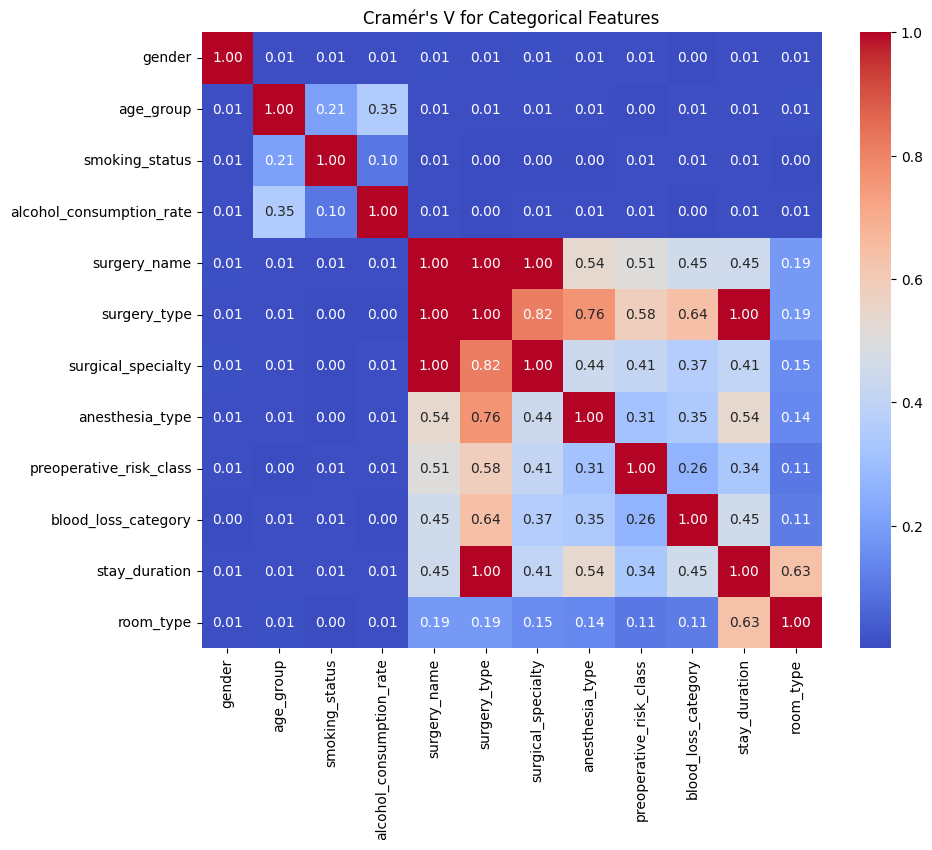

In [14]:
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


def cramers_v(x, y):
    # Create contingency table
    crosstab = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    return np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

# Apply Cramér's V for pairs of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

# Visualize the Cramér's V matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V for Categorical Features")
plt.show()


In [5]:
surgery_data['preoperative_risk_class'].value_counts()

preoperative_risk_class
Low          282
High         267
Very High    250
Moderate     201
Name: count, dtype: int64

In [15]:
# Export DataFrame to CSV
df.to_csv('surgery_record.csv', index=False)
